In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import os
import datetime



In [5]:
#pull in data and get rid of non-province entries
#get rid of america as a province

winemag2 = "./csv/winemag-data-130k-rob.csv"
winemag_data2 = pd.read_csv(winemag2)
#df = df[df.line_race != 0]
winemag_data2 = winemag_data2[winemag_data2.province != 'America']

In [3]:
#remove unnecessary/unused columns
winemag2_df = winemag_data2.drop(columns=["Unnamed: 0","description","region_1","region_2","taster_name","taster_twitter_handle","title"])
winemag2_df.head()

,country,designation,points,price,province,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Pinot Noir,Sweet Cheeks


In [6]:
#check row counts
winemag_all_rows = winemag2_df
winemag_all_rows.count()

country        129813
designation     92437
points         129876
price          120880
province       129813
variety        129875
winery         129876
dtype: int64

In [7]:
# get rid of the indexing from xls
winemag_all_rows=winemag_all_rows.reset_index(drop=True)
winemag_all_rows.head()

,country,designation,points,price,province,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Pinot Noir,Sweet Cheeks


In [9]:
# have a look at the country counts and averages
by_country_count = winemag_all_rows.groupby("country").count()
by_country_count
by_country_mean = winemag_all_rows.groupby("country").mean().reset_index() #get country to show
by_country_mean.head()


,country,points,price
0,Argentina,86.710263,24.510117
1,Armenia,87.500000,14.500000
2,Australia,88.580507,35.437663
3,Austria,90.101345,30.762772
4,Bosnia and Herzegovina,86.500000,12.500000


In [11]:
# just in case I want to look at the data 
winemag_all_rows.to_csv("./csv/winemag_cleaned.csv")

In [12]:
#verify data
winemag_all_rows.shape

(129876, 7)

In [13]:
# clean up blank entries
winemag_all_cleaned = winemag_all_rows.dropna()

In [14]:
# Strip out US specific data
winemag_US = winemag_all_rows.loc[winemag_all_rows['country'] == "US"]
winemag_US.head()

,country,designation,points,price,province,variety,winery
2,US,NaN,87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Pinot Noir,Sweet Cheeks
10,US,Mountain Cuvée,87,19.0,California,Cabernet Sauvignon,Kirkland Signature
12,US,NaN,87,34.0,California,Cabernet Sauvignon,Louis M. Martini


In [17]:
# order by state & use as index
by_US_state = winemag_US.groupby("province").mean().reset_index()
by_US_state.head()

,province,points,price
0,Arizona,84.926829,29.200000
1,California,88.627776,39.041048
2,Colorado,86.117647,32.985294
3,Connecticut,84.000000,15.333333
4,Hawaii,87.000000,28.000000


In [19]:
# adjust the by state values for better viewing
by_state_mean = by_US_state.sort_values(by=['points'], ascending=False)
by_state_mean["points"] = by_state_mean["points"] - 80

In [22]:
# adjust country values to better highlight the differences
by_country_mean = by_country_mean.sort_values(by=['points'], ascending=False)
by_country_mean["points"] = by_country_mean["points"] - 80

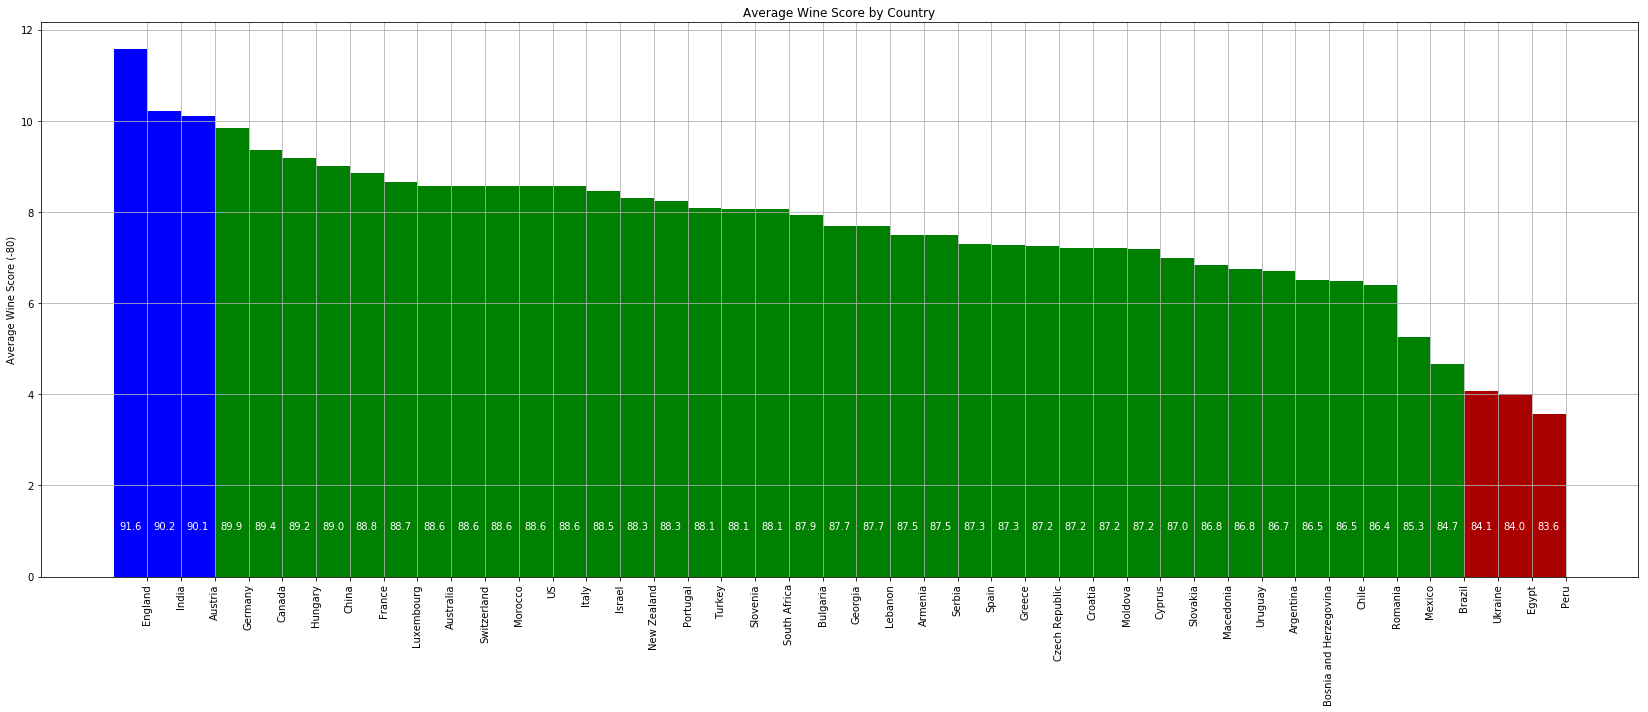

In [23]:
labels = by_country_mean["country"]
score_vals = by_country_mean["points"]
scorechange = by_country_mean["points"]

x = np.arange(len(labels))  # the label locations
#width = 0.35  # the width of the bars
width = 1  # the width of the bars

fig, ax = plt.subplots(figsize=(23,10))
#fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, drug_vals, width)
rects1 = ax.bar(x - width/2, score_vals, width, color=['#0000FF' if row >= 10 else '#AA0000' if row < 4.5  else '#008000'  for row in scorechange])
#['yes' if v == 1 else 'no' if v == 2 else 'idle' for v in l]#800080 red='#AA0000' green='#008000' purple= '#800080'
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Wine Score (-80)')
ax.set_title('Average Wine Score by Country')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
#ax.legend()
ax.grid()



def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        #print(height)

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)
        
        if height < 0: 
            label_position =  -1   
        else:
            label_position = 1 
        #dispval = int(height)
        dispval = height
        if dispval >= 90:
            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '8%.1f' % dispval,
                 ha='center', va='bottom', color = "w")
        else:
            dispval = dispval + 80
            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%.1f' % dispval,
                 ha='center', va='bottom', color = "w")

autolabel(rects1 ,ax)

fig.tight_layout()
fig.savefig("./out/by_country1.png")
#fig.show()

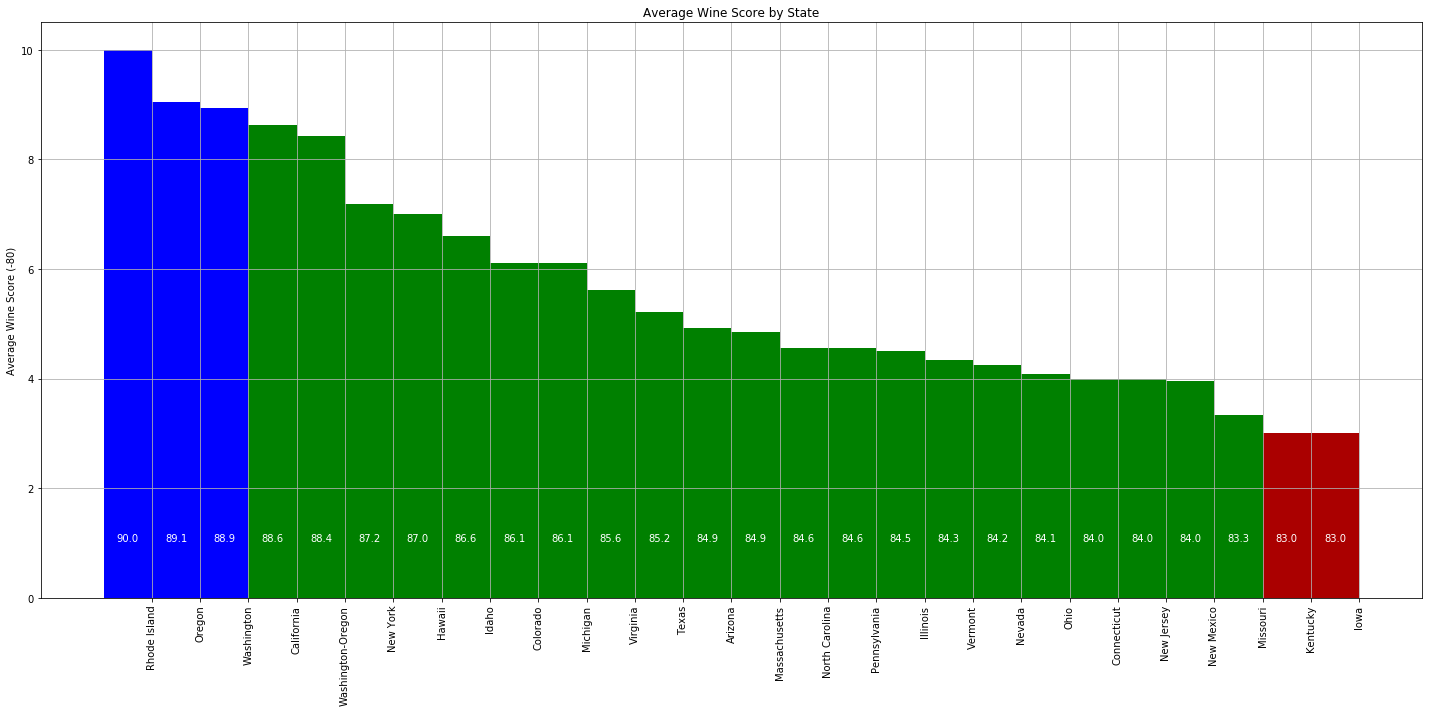

In [21]:
labels = by_state_mean["province"]
score_vals = by_state_mean["points"]
scorechange = by_state_mean["points"]

x = np.arange(len(labels))  # the label locations
#width = 0.35  # the width of the bars
width = 1  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
#rects1 = ax.bar(x - width/2, drug_vals, width)
rects1 = ax.bar(x - width/2, score_vals, width, color=['#0000FF' if row >= 8.7 else '#AA0000' if row <= 3  else '#008000'  for row in scorechange])
#['yes' if v == 1 else 'no' if v == 2 else 'idle' for v in l]#800080 red='#AA0000' green='#008000' purple= '#800080'
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Wine Score (-80)')
ax.set_title('Average Wine Score by State')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
#ax.legend()
ax.grid()



def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        #print(height)

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)
        
        if height < 0: 
            label_position =  -1   
        else:
            label_position = 1 
        #dispval = int(height)
        dispval = height
        if dispval >= 90:
            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '8%.1f' % dispval,
                 ha='center', va='bottom', color = "w")
        else:
            dispval = dispval + 80
            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%.1f' % dispval,
                 ha='center', va='bottom', color = "w")

autolabel(rects1 ,ax)

plt.tight_layout()
plt.savefig("./out/by_state1.png")
plt.show()